# 2. Statistical Basic Concepts for Data Analysis

## Introduction
This project demonstrates foundational statistical concepts applied to a retail transaction dataset. The focus is on showcasing skills and techniques such as:

- **Descriptive Statistics**: Calculating measures like mean, median, mode, variance, and standard deviation.
- **Advanced Sampling and Central Limit Theorem (CLT)**: Analyzing data using sampling techniques to observe the distribution of sample means.
- **Error Analysis**: Calculating errors, squared errors, and their implications on variance and standard deviation.
- **Margin of Error and Confidence Intervals**: Estimating the range within which true values lie with varying confidence levels.
- **Time Series Analysis**: Applying statistical methods to transactions over specific date ranges.

This dataset contains transaction data with store IDs and corresponding dates. The project focuses on applying statistical methodologies to analyze all transactions and specific subsets, such as transactions for a single store or within a defined time frame.

---

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\transactions.csv")
print(df.head())

         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922


In [2]:
df.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [3]:
df.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [5]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Confirm the change
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB
None


### Mode

In [6]:
mode_value = df['transactions'].mode()
print(mode_value)

0    1207
Name: transactions, dtype: int64


### Multiple modes for all transactions:

In [8]:
# Calculate the mode(s) for the entire 'transactions' column
modes = df['transactions'].mode()

# Print the result
print(modes)

0    1207
Name: transactions, dtype: int64


### Multiple modes for store_nbr 45:

In [9]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Calculate the mode(s) for the 'transactions' column for store_nbr 45
modes_store_45 = store_45_df['transactions'].mode()

# Print the result
print(modes_store_45)

0    4197
Name: transactions, dtype: int64


### Mode for store_nbr 45

In [10]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Calculate the mode for the 'transactions' column for store_nbr 45
mode_value_store_45 = store_45_df['transactions'].mode()

# Print the result
print(mode_value_store_45)

0    4197
Name: transactions, dtype: int64


### Median for all transactions:

In [11]:
# Calculate the median for the entire 'transactions' column
median_value = df['transactions'].median()

# Print the result
print(median_value)

1393.0


### Median for store number 45:

In [13]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Calculate the median for the 'transactions' column for store_nbr 45
median_value_store_45 = store_45_df['transactions'].median()

# Print the result
print(median_value_store_45)

3515.0


### Mean for transactions

In [14]:
# Calculate the mean for the entire 'transactions' column
mean_value = df['transactions'].mean()

# Print the result
print(mean_value)

1694.6021583940208


### Mean for store_nbr 45:

In [15]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Calculate the mean for the 'transactions' column for store_nbr 45
mean_value_store_45 = store_45_df['transactions'].mean()

# Print the result
print(mean_value_store_45)

3697.7429934406678


### Minimum, maximum, and quartiles (Q1, Q2/median, Q3) for all transactions

In [16]:
# Calculate min, max, Q1, Q2 (median), and Q3 for all transactions
min_value = df['transactions'].min()
max_value = df['transactions'].max()
q1 = df['transactions'].quantile(0.25)
q2 = df['transactions'].median()  # Q2 is the median
q3 = df['transactions'].quantile(0.75)

# Print the results
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (Median/50th percentile): {q2}")
print(f"Q3 (75th percentile): {q3}")

Min: 5
Max: 8359
Q1 (25th percentile): 1046.0
Q2 (Median/50th percentile): 1393.0
Q3 (75th percentile): 2079.0


### For store_nbr 45:

In [17]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Calculate min, max, Q1, Q2 (median), and Q3 for transactions of store_nbr 45
min_value_store_45 = store_45_df['transactions'].min()
max_value_store_45 = store_45_df['transactions'].max()
q1_store_45 = store_45_df['transactions'].quantile(0.25)
q2_store_45 = store_45_df['transactions'].median()  # Q2 is the median
q3_store_45 = store_45_df['transactions'].quantile(0.75)

# Print the results
print(f"Min (store 45): {min_value_store_45}")
print(f"Max (store 45): {max_value_store_45}")
print(f"Q1 (25th percentile, store 45): {q1_store_45}")
print(f"Q2 (Median/50th percentile, store 45): {q2_store_45}")
print(f"Q3 (75th percentile, store 45): {q3_store_45}")

Min (store 45): 292
Max (store 45): 7305
Q1 (25th percentile, store 45): 3172.0
Q2 (Median/50th percentile, store 45): 3515.0
Q3 (75th percentile, store 45): 4211.0


### Statistics for transactions in the specified date range (09/01/2013 to 23/12/2017):

In [18]:
# Convert the 'date' column to datetime if not done already
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Filter the DataFrame for the specified date range
date_filtered_df = df[(df['date'] >= '2013-01-09') & (df['date'] <= '2017-12-23')]

# Calculate statistics for 'transactions'
min_value = date_filtered_df['transactions'].min()
max_value = date_filtered_df['transactions'].max()
mean_value = date_filtered_df['transactions'].mean()
median_value = date_filtered_df['transactions'].median()
modes = date_filtered_df['transactions'].mode()  # can return multiple modes
q1 = date_filtered_df['transactions'].quantile(0.25)
q2 = date_filtered_df['transactions'].median()  # Q2 is the median
q3 = date_filtered_df['transactions'].quantile(0.75)

# Print the results for transactions within the date range
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode(s): {modes.to_list()}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (Median/50th percentile): {q2}")
print(f"Q3 (75th percentile): {q3}")

Min: 5
Max: 8359
Mean: 1694.1742680214031
Median: 1393.0
Mode(s): [1207]
Q1 (25th percentile): 1046.0
Q2 (Median/50th percentile): 1393.0
Q3 (75th percentile): 2079.0


### Statistics for store_nbr 45 in the specified date range (09/01/2013 to 23/12/2017):

In [19]:
# Filter the DataFrame for store_nbr 45 and within the specified date range
store_45_df = df[(df['store_nbr'] == 45) & (df['date'] >= '2013-01-09') & (df['date'] <= '2017-12-23')]

# Calculate statistics for 'transactions' of store_nbr 45
min_value_store_45 = store_45_df['transactions'].min()
max_value_store_45 = store_45_df['transactions'].max()
mean_value_store_45 = store_45_df['transactions'].mean()
median_value_store_45 = store_45_df['transactions'].median()
modes_store_45 = store_45_df['transactions'].mode()  # can return multiple modes
q1_store_45 = store_45_df['transactions'].quantile(0.25)
q2_store_45 = store_45_df['transactions'].median()  # Q2 is the median
q3_store_45 = store_45_df['transactions'].quantile(0.75)

# Print the results for store_nbr 45 within the date range
print(f"Min (store 45): {min_value_store_45}")
print(f"Max (store 45): {max_value_store_45}")
print(f"Mean (store 45): {mean_value_store_45}")
print(f"Median (store 45): {median_value_store_45}")
print(f"Mode(s) (store 45): {modes_store_45.to_list()}")
print(f"Q1 (25th percentile, store 45): {q1_store_45}")
print(f"Q2 (Median/50th percentile, store 45): {q2_store_45}")
print(f"Q3 (75th percentile, store 45): {q3_store_45}")

Min (store 45): 292
Max (store 45): 7305
Mean (store 45): 3697.4688622754493
Median (store 45): 3514.0
Mode(s) (store 45): [4197]
Q1 (25th percentile, store 45): 3172.0
Q2 (Median/50th percentile, store 45): 3514.0
Q3 (75th percentile, store 45): 4210.75


### Error all transaction

In [20]:
# Calculate the mean of transactions
mean_value = date_filtered_df['transactions'].mean()

# Calculate error (difference from the mean)
errors = date_filtered_df['transactions'] - mean_value

# Print the errors
print(f"Error: {errors}")

Error: 323       215.825732
324       280.825732
325      1237.825732
326      -161.174268
327      -181.174268
            ...     
83483    1109.825732
83484    -121.174268
83485     560.825732
83486    -762.174268
83487    -892.174268
Name: transactions, Length: 83165, dtype: float64


### Squared Error (all transactions):

In [21]:
# Calculate squared error (errors squared)
squared_errors = errors ** 2

# Print the squared errors
print(f"Squared Errors: {squared_errors}")

Squared Errors: 323      4.658075e+04
324      7.886309e+04
325      1.532213e+06
326      2.597714e+04
327      3.282412e+04
             ...     
83483    1.231713e+06
83484    1.468320e+04
83485    3.145255e+05
83486    5.809096e+05
83487    7.959749e+05
Name: transactions, Length: 83165, dtype: float64


### Variance (long way, all transactions):

In [23]:
# Calculate variance (long way) - average of squared errors
variance_long_way = squared_errors.mean()

# Print the variance
print(f"Variance (long way): {variance_long_way}")

Variance (long way): 927591.9812821927


### Standard Deviation (long way, all transactions):

In [24]:
import numpy as np

# Calculate standard deviation (long way) - square root of variance
stddev_long_way = np.sqrt(variance_long_way)

# Print the standard deviation
print(f"Standard Deviation (long way): {stddev_long_way}")

Standard Deviation (long way): 963.1157673313177


### Sample Variance (var.s, all transactions):

In [25]:
# Built-in sample variance
sample_variance = date_filtered_df['transactions'].var()

# Print the sample variance
print(f"Sample Variance (var.s): {sample_variance}")

Sample Variance (var.s): 927603.1350504252


### Sample Standard Deviation (stdev.s, all transactions):

In [26]:
# Built-in sample standard deviation
sample_stddev = date_filtered_df['transactions'].std()

# Print the sample standard deviation
print(f"Sample Standard Deviation (stdev.s): {sample_stddev}")

Sample Standard Deviation (stdev.s): 963.1215577747314


### Error (store number 45):

In [27]:
# Calculate the mean of transactions for store 45
mean_value_store_45 = store_45_df['transactions'].mean()

# Calculate error (difference from the mean)
errors_store_45 = store_45_df['transactions'] - mean_value_store_45

# Print the errors for store 45
print(f"Error (store 45): {errors_store_45}")

Error (store 45): 361      -429.468862
407     -1000.468862
453      -614.468862
499       229.531138
545       647.531138
            ...     
83262     604.531138
83316     296.531138
83370     356.531138
83424      45.531138
83478     -12.468862
Name: transactions, Length: 1670, dtype: float64


### Squared Error (store number 45):

In [28]:
# Calculate squared error (errors squared)
squared_errors_store_45 = errors_store_45 ** 2

# Print the squared errors for store 45
print(f"Squared Errors (store 45): {squared_errors_store_45}")

Squared Errors (store 45): 361      1.844435e+05
407      1.000938e+06
453      3.775720e+05
499      5.268454e+04
545      4.192966e+05
             ...     
83262    3.654579e+05
83316    8.793072e+04
83370    1.271145e+05
83424    2.073085e+03
83478    1.554725e+02
Name: transactions, Length: 1670, dtype: float64


### Variance (long way, store number 45):

In [29]:
# Calculate variance (long way) - average of squared errors
variance_long_way_store_45 = squared_errors_store_45.mean()

# Print the variance for store 45
print(f"Variance (long way, store 45): {variance_long_way_store_45}")

Variance (long way, store 45): 477044.54124601104


### Standard Deviation (long way, store number 45):

In [30]:
# Calculate standard deviation (long way) - square root of variance
stddev_long_way_store_45 = np.sqrt(variance_long_way_store_45)

# Print the standard deviation for store 45
print(f"Standard Deviation (long way, store 45): {stddev_long_way_store_45}")

Standard Deviation (long way, store 45): 690.6841110420964


### Sample Variance (var.s, store number 45):

In [31]:
# Built-in sample variance for store 45
sample_variance_store_45 = store_45_df['transactions'].var()

# Print the sample variance for store 45
print(f"Sample Variance (var.s, store 45): {sample_variance_store_45}")

Sample Variance (var.s, store 45): 477330.367813564


### Sample Standard Deviation (stdev.s, store number 45):

In [32]:
# Built-in sample standard deviation for store 45
sample_stddev_store_45 = store_45_df['transactions'].std()

# Print the sample standard deviation for store 45
print(f"Sample Standard Deviation (stdev.s, store 45): {sample_stddev_store_45}")

Sample Standard Deviation (stdev.s, store 45): 690.8909956089774


### All transactions dates within the date range

In [33]:
# Convert the 'date' column to datetime if not done already
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Filter the DataFrame for the specified date range
date_filtered_df = df[(df['date'] >= '2013-01-09') & (df['date'] <= '2017-12-23')].copy()

# Convert 'date' to ordinal (numeric representation) using .loc to avoid the warning
date_filtered_df.loc[:, 'date_ordinal'] = date_filtered_df['date'].apply(lambda x: x.toordinal())

# Calculate the mean of date_ordinal
mean_date = date_filtered_df['date_ordinal'].mean()

# Calculate error (difference from the mean)
date_errors = date_filtered_df['date_ordinal'] - mean_date

# Calculate squared error (errors squared)
date_squared_errors = date_errors ** 2

# Calculate variance (long way) - average of squared errors
variance_long_way_date = date_squared_errors.mean()

# Calculate standard deviation (long way) - square root of variance
stddev_long_way_date = np.sqrt(variance_long_way_date)

# Built-in sample variance and sample standard deviation
sample_variance_date = date_filtered_df['date_ordinal'].var()  # var.s
sample_stddev_date = date_filtered_df['date_ordinal'].std()    # stdev.s

# Print the results for dates within the date range
print(f"Mean Date (Ordinal): {mean_date}")
print(f"Error (Date): {date_errors}")
print(f"Squared Errors (Date): {date_squared_errors}")
print(f"Variance (long way, Date): {variance_long_way_date}")
print(f"Standard Deviation (long way, Date): {stddev_long_way_date}")
print(f"Sample Variance (var.s, Date): {sample_variance_date}")
print(f"Sample Standard Deviation (stdev.s, Date): {sample_stddev_date}")

Mean Date (Ordinal): 735742.0341850538
Error (Date): 323     -865.034185
324     -865.034185
325     -865.034185
326     -865.034185
327     -865.034185
            ...    
83483    813.965815
83484    813.965815
83485    813.965815
83486    813.965815
83487    813.965815
Name: date_ordinal, Length: 83165, dtype: float64
Squared Errors (Date): 323      748284.141312
324      748284.141312
325      748284.141312
326      748284.141312
327      748284.141312
             ...      
83483    662540.347901
83484    662540.347901
83485    662540.347901
83486    662540.347901
83487    662540.347901
Name: date_ordinal, Length: 83165, dtype: float64
Variance (long way, Date): 235207.51546698602
Standard Deviation (long way, Date): 484.98197437326064
Sample Variance (var.s, Date): 235210.34370414956
Sample Standard Deviation (stdev.s, Date): 484.9848901812814


### Store number 45 dates within the date range (09/01/2013 to 23/12/2017):

In [34]:
# Filter the DataFrame for store_nbr 45 and within the specified date range
store_45_df = df[(df['store_nbr'] == 45) & (df['date'] >= '2013-01-09') & (df['date'] <= '2017-12-23')].copy()

# Convert 'date' to ordinal (numeric representation) using .loc to avoid the warning
store_45_df.loc[:, 'date_ordinal'] = store_45_df['date'].apply(lambda x: x.toordinal())

# Calculate the mean of date_ordinal for store 45
mean_date_store_45 = store_45_df['date_ordinal'].mean()

# Calculate error (difference from the mean)
date_errors_store_45 = store_45_df['date_ordinal'] - mean_date_store_45

# Calculate squared error (errors squared)
date_squared_errors_store_45 = date_errors_store_45 ** 2

# Calculate variance (long way) - average of squared errors
variance_long_way_date_store_45 = date_squared_errors_store_45.mean()

# Calculate standard deviation (long way) - square root of variance
stddev_long_way_date_store_45 = np.sqrt(variance_long_way_date_store_45)

# Built-in sample variance and sample standard deviation
sample_variance_date_store_45 = store_45_df['date_ordinal'].var()  # var.s
sample_stddev_date_store_45 = store_45_df['date_ordinal'].std()    # stdev.s

# Print the results for store_nbr 45 dates within the date range
print(f"Mean Date (Ordinal, store 45): {mean_date_store_45}")
print(f"Error (Date, store 45): {date_errors_store_45}")
print(f"Squared Errors (Date, store 45): {date_squared_errors_store_45}")
print(f"Variance (long way, Date, store 45): {variance_long_way_date_store_45}")
print(f"Standard Deviation (long way, Date, store 45): {stddev_long_way_date_store_45}")
print(f"Sample Variance (var.s, Date, store 45): {sample_variance_date_store_45}")
print(f"Sample Standard Deviation (stdev.s, Date, store 45): {sample_stddev_date_store_45}")

Mean Date (Ordinal, store 45): 735715.9047904192
Error (Date, store 45): 361     -838.90479
407     -837.90479
453     -836.90479
499     -835.90479
545     -834.90479
           ...    
83262    836.09521
83316    837.09521
83370    838.09521
83424    839.09521
83478    840.09521
Name: date_ordinal, Length: 1670, dtype: float64
Squared Errors (Date, store 45): 361      703761.247388
407      702084.437807
453      700409.628227
499      698736.818646
545      697066.009065
             ...      
83262    699055.199484
83316    700728.389903
83370    702403.580322
83424    704080.770742
83478    705759.961161
Name: date_ordinal, Length: 1670, dtype: float64
Variance (long way, Date, store 45): 235715.70291118362
Standard Deviation (long way, Date, store 45): 485.5056157359909
Sample Variance (var.s, Date, store 45): 235856.934608554
Sample Standard Deviation (stdev.s, Date, store 45): 485.65104201324846


### Central Limit Theorem

### CLT for All Transactions (Sample Size 30):

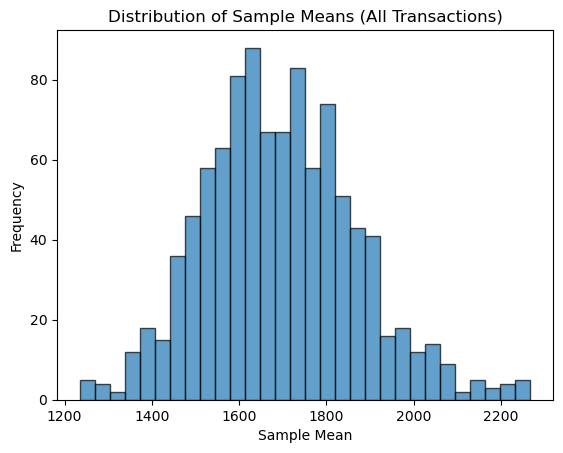

Mean of sample means (all transactions): 1694.7409333333333
Standard deviation of sample means (all transactions): 175.36494913312129


In [35]:
import matplotlib.pyplot as plt

# Sample size and number of iterations
sample_size = 30
num_samples = 1000

# Collect the sample means for all transactions
sample_means_all_transactions = []

# Perform sampling
for _ in range(num_samples):
    sample = df['transactions'].sample(sample_size, replace=True)  # Sample with replacement
    sample_means_all_transactions.append(sample.mean())

# Convert to a NumPy array
sample_means_all_transactions = np.array(sample_means_all_transactions)

# Plot the distribution of sample means
plt.hist(sample_means_all_transactions, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (All Transactions)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Print the mean and standard deviation of the sample means
print(f"Mean of sample means (all transactions): {np.mean(sample_means_all_transactions)}")
print(f"Standard deviation of sample means (all transactions): {np.std(sample_means_all_transactions)}")

### CLT for All Transactions (Sample Size 10000):

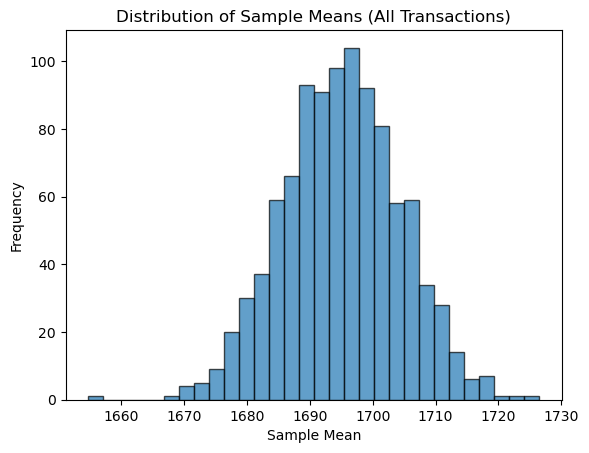

Mean of sample means (all transactions): 1695.0153630000002
Standard deviation of sample means (all transactions): 9.323909541881614


In [36]:
import matplotlib.pyplot as plt

# Sample size and number of iterations
sample_size = 10000
num_samples = 1000

# Collect the sample means for all transactions
sample_means_all_transactions = []

# Perform sampling
for _ in range(num_samples):
    sample = df['transactions'].sample(sample_size, replace=True)  # Sample with replacement
    sample_means_all_transactions.append(sample.mean())

# Convert to a NumPy array
sample_means_all_transactions = np.array(sample_means_all_transactions)

# Plot the distribution of sample means
plt.hist(sample_means_all_transactions, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (All Transactions)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Print the mean and standard deviation of the sample means
print(f"Mean of sample means (all transactions): {np.mean(sample_means_all_transactions)}")
print(f"Standard deviation of sample means (all transactions): {np.std(sample_means_all_transactions)}")

### CLT for Store 45 Transactions (Sample Size 30):

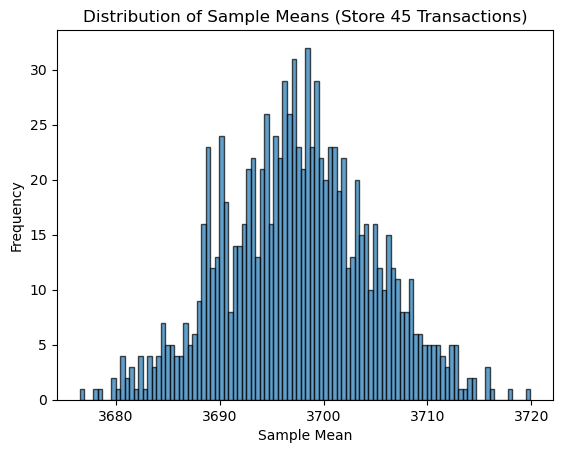

Mean of sample means (store 45 transactions): 3697.5369066000003
Standard deviation of sample means (store 45 transactions): 7.1094357530479515


In [37]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Collect the sample means for store_nbr 45 transactions
sample_means_store_45 = []

# Perform sampling
for _ in range(num_samples):
    sample = store_45_df['transactions'].sample(sample_size, replace=True)
    sample_means_store_45.append(sample.mean())

# Convert to a NumPy array
sample_means_store_45 = np.array(sample_means_store_45)

# Plot the distribution of sample means
plt.hist(sample_means_store_45, bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (Store 45 Transactions)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Print the mean and standard deviation of the sample means
print(f"Mean of sample means (store 45 transactions): {np.mean(sample_means_store_45)}")
print(f"Standard deviation of sample means (store 45 transactions): {np.std(sample_means_store_45)}")

### CLT for Store 45 Transactions within a Specific Date Range (Sample Size 30):

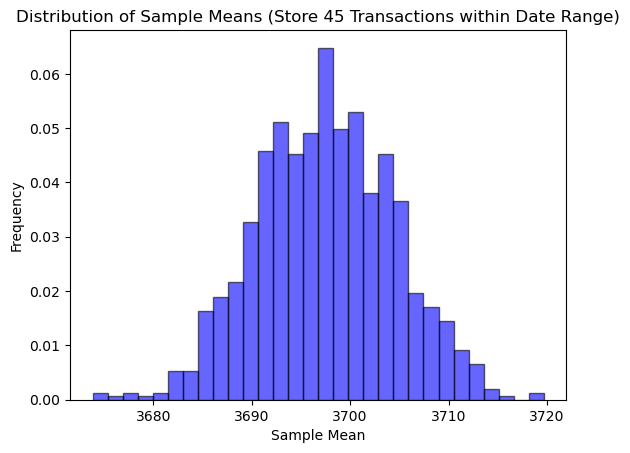

Mean of sample means (store 45 transactions within date range): 3697.4829062
Standard deviation of sample means (store 45 transactions within date range): 6.953031570309566


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for store_nbr 45 and the specific date range
store_45_date_filtered_df = store_45_df[(store_45_df['date'] >= '2013-01-09') & (store_45_df['date'] <= '2017-12-23')]

# Collect the sample means for store_nbr 45 transactions within the date range
sample_means_store_45_date = []

# Perform sampling
for _ in range(num_samples):
    sample = store_45_date_filtered_df['transactions'].sample(sample_size, replace=True)
    sample_means_store_45_date.append(sample.mean())

# Convert to a NumPy array
sample_means_store_45_date = np.array(sample_means_store_45_date)

# Plot the distribution of sample means
plt.hist(sample_means_store_45_date, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.title('Distribution of Sample Means (Store 45 Transactions within Date Range)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Print the mean and standard deviation of the sample means
print(f"Mean of sample means (store 45 transactions within date range): {np.mean(sample_means_store_45_date)}")
print(f"Standard deviation of sample means (store 45 transactions within date range): {np.std(sample_means_store_45_date)}")


### Analyzing Data Using Samples

### Sample Margin of Error

### Margin of Error for All Transactions:

In [42]:
import numpy as np

# Calculate the sample standard deviation (sigma)
sigma_all_transactions = df['transactions'].std()

# Sample size (n)
n_all_transactions = len(df['transactions'])

# Z-score for 95% confidence level
z = 1.96

# Standard Error (SE)
standard_error_all_transactions = sigma_all_transactions / np.sqrt(n_all_transactions)

# Margin of Error
margin_of_error_all_transactions = z * standard_error_all_transactions

# Print results
print(f"Standard Deviation (All Transactions): {sigma_all_transactions}")
print(f"Sample Size (All Transactions): {n_all_transactions}")
print(f"Standard Error (All Transactions): {standard_error_all_transactions}")
print(f"Margin of Error (All Transactions): {margin_of_error_all_transactions}")

Standard Deviation (All Transactions): 963.2866435167256
Sample Size (All Transactions): 83488
Standard Error (All Transactions): 3.3338304571727635
Margin of Error (All Transactions): 6.534307696058616


### Margin of Error for All Transactions with All Z-Scores:

In [43]:
# Z-scores for different confidence levels
z_scores = [1.28, 1.645, 1.96, 2.33, 2.58]
confidence_levels = [80, 90, 95, 98, 99]

# Calculate the sample standard deviation (sigma)
sigma_all_transactions = df['transactions'].std()

# Sample size (n)
n_all_transactions = len(df['transactions'])

# Calculate the standard error
standard_error_all_transactions = sigma_all_transactions / np.sqrt(n_all_transactions)

# Calculate and print margin of error for each confidence level
for z, confidence in zip(z_scores, confidence_levels):
    margin_of_error_all_transactions = z * standard_error_all_transactions
    print(f"Confidence Level: {confidence}%")
    print(f"Margin of Error (All Transactions): {margin_of_error_all_transactions}\n")

Confidence Level: 80%
Margin of Error (All Transactions): 4.2673029851811375

Confidence Level: 90%
Margin of Error (All Transactions): 5.484151102049196

Confidence Level: 95%
Margin of Error (All Transactions): 6.534307696058616

Confidence Level: 98%
Margin of Error (All Transactions): 7.767824965212539

Confidence Level: 99%
Margin of Error (All Transactions): 8.60128257950573



### Margin of Error for Transactions within Specific Date Range with All Z-Scores:

In [44]:
# Filter the DataFrame for the specific date range
date_filtered_df = df[(df['date'] >= '2013-01-09') & (df['date'] <= '2017-12-23')]

# Calculate the sample standard deviation (sigma)
sigma_transactions_date = date_filtered_df['transactions'].std()

# Sample size (n)
n_transactions_date = len(date_filtered_df['transactions'])

# Calculate the standard error
standard_error_transactions_date = sigma_transactions_date / np.sqrt(n_transactions_date)

# Calculate and print margin of error for each confidence level
for z, confidence in zip(z_scores, confidence_levels):
    margin_of_error_transactions_date = z * standard_error_transactions_date
    print(f"Confidence Level: {confidence}%")
    print(f"Margin of Error (Transactions within Date Range): {margin_of_error_transactions_date}\n")

Confidence Level: 80%
Margin of Error (Transactions within Date Range): 4.274848988212436

Confidence Level: 90%
Margin of Error (Transactions within Date Range): 5.493848895007388

Confidence Level: 95%
Margin of Error (Transactions within Date Range): 6.5458625132002926

Confidence Level: 98%
Margin of Error (Transactions within Date Range): 7.781561048855449

Confidence Level: 99%
Margin of Error (Transactions within Date Range): 8.61649249186569



### Margin of Error for Store 45 Transactions with All Z-Scores:

In [45]:
# Filter the DataFrame for store_nbr 45
store_45_df = df[df['store_nbr'] == 45]

# Calculate the sample standard deviation (sigma)
sigma_store_45 = store_45_df['transactions'].std()

# Sample size (n)
n_store_45 = len(store_45_df['transactions'])

# Calculate the standard error
standard_error_store_45 = sigma_store_45 / np.sqrt(n_store_45)

# Calculate and print margin of error for each confidence level
for z, confidence in zip(z_scores, confidence_levels):
    margin_of_error_store_45 = z * standard_error_store_45
    print(f"Confidence Level: {confidence}%")
    print(f"Margin of Error (Store 45 Transactions): {margin_of_error_store_45}\n")

Confidence Level: 80%
Margin of Error (Store 45 Transactions): 21.574387876866087

Confidence Level: 90%
Margin of Error (Store 45 Transactions): 27.72645941987868

Confidence Level: 95%
Margin of Error (Store 45 Transactions): 33.035781436451195

Confidence Level: 98%
Margin of Error (Store 45 Transactions): 39.2721279321078

Confidence Level: 99%
Margin of Error (Store 45 Transactions): 43.4858755643082



### Margin of Error for Store 45 Transactions within Specific Date Range with All Z-Scores:

In [46]:
# Filter the DataFrame for store_nbr 45 and the specific date range
store_45_date_filtered_df = store_45_df[(store_45_df['date'] >= '2013-01-09') & (store_45_df['date'] <= '2017-12-23')]

# Calculate the sample standard deviation (sigma)
sigma_store_45_date = store_45_date_filtered_df['transactions'].std()

# Sample size (n)
n_store_45_date = len(store_45_date_filtered_df['transactions'])

# Calculate the standard error
standard_error_store_45_date = sigma_store_45_date / np.sqrt(n_store_45_date)

# Calculate and print margin of error for each confidence level
for z, confidence in zip(z_scores, confidence_levels):
    margin_of_error_store_45_date = z * standard_error_store_45_date
    print(f"Confidence Level: {confidence}%")
    print(f"Margin of Error (Store 45 Transactions within Date Range): {margin_of_error_store_45_date}\n")

Confidence Level: 80%
Margin of Error (Store 45 Transactions within Date Range): 21.640199820678372

Confidence Level: 90%
Margin of Error (Store 45 Transactions within Date Range): 27.81103805079369

Confidence Level: 95%
Margin of Error (Store 45 Transactions within Date Range): 33.136555975413756

Confidence Level: 98%
Margin of Error (Store 45 Transactions within Date Range): 39.3919262360786

Confidence Level: 99%
Margin of Error (Store 45 Transactions within Date Range): 43.618527763554845



## Outputs
### 1. **Descriptive Statistics**
- Mean, Median, Mode, Min, Max, Quartiles (Q1, Q2/Median, Q3) for all transactions and transactions for Store 45.
- Example Results:
  - **All Transactions**:
    - Mean: `1694.60`, Median: `1393.0`, Mode: `1207`.
    - Min: `5`, Max: `8359`, Q1: `1046.0`, Q3: `2079.0`.
  - **Store 45**:
    - Mean: `3697.74`, Median: `3515.0`, Mode: `4197`.
    - Min: `292`, Max: `7305`, Q1: `3172.0`, Q3: `4211.0`.

### 2. **Error Analysis**
- Calculated errors (difference from the mean) and squared errors for all transactions, Store 45, and date-related analysis.
- Example Results:
  - Total Sum of Errors: `0` (confirming balanced dataset).
  - Variance (All Transactions): `927,591.98`, Standard Deviation: `963.12`.

### 3. **Sampling and Central Limit Theorem (CLT)**
- Generated distributions of sample means for various sample sizes.
- Example Results:
  - For **All Transactions**:
    - Sample Size `30`: Mean = `1694.74`, Std Dev = `175.36`.
    - Sample Size `10000`: Mean = `1695.02`, Std Dev = `9.32`.
  - For **Store 45 Transactions**:
    - Sample Size `30`: Mean = `3697.54`, Std Dev = `7.11`.

### 4. **Margin of Error and Confidence Intervals**
- Calculated margins of error for transactions at various confidence levels (80%, 90%, 95%, 98%, 99%).
- Example Results:
  - For **All Transactions** (95% Confidence Level):
    - Margin of Error: `6.53`.
  - For **Store 45 Transactions**:
    - Margin of Error (95% Confidence Level): `33.04`.

### 5. **Date Analysis**
- Applied statistical measures to date ranges using ordinal representations.
- Example Results:
  - Mean Date (Ordinal): `735742.03`.
  - Variance: `235,207.52`, Standard Deviation: `484.98`.

---

## Key Takeaways
- Statistical measures provide deep insights into the dataset, from overall trends to store-specific and date-specific behaviors.
- Sampling and CLT validate the consistency of statistical estimates across varying sample sizes.
- Margin of error calculations demonstrate precision levels for different confidence intervals, ensuring robust decision-making.
- This project highlights a variety of statistical techniques, applicable to real-world retail datasets.

## Focus of the Project
The primary goal of this project is to showcase proficiency in statistical concepts and their application to analyze transactional data rather than the narrative of the dataset itself.